In [261]:
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import DistanceMetric
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt

In [262]:
def euc_distance(a, b):
    dist = DistanceMetric.get_metric('euclidean')
    ndarray = dist.pairwise([a, b])
    distance = ndarray[0][-1]
    return distance

In [263]:
def closest(trainSet, trainLabels, row):
    dists = [euc_distance(row, item) for item in trainSet]
    nei = dists.index(min(dists))
    return trainLabels[nei]

In [264]:
def predict(trainSet, trainLabels, to_classify, k):
    predictions = []
    for row in to_classify:
        labels = kClosest(trainSet, trainLabels, row, k)
        predictions.append(max(set(labels), key=labels.count))
    return predictions

In [265]:
def kClosest(trainSet, trainLabels, row, k):
    labels = list(trainLabels)
    dists = [euc_distance(row, item) for item in trainSet]
    kclosest = []
    for i in range(k):
        nei = dists.index(min(dists))
        kclosest.append(labels[nei])
        del dists[nei]
        del labels[nei]
    return kclosest

In [266]:
dataSet = pd.read_csv('train.csv')

In [267]:
dataSet.drop(['Ticket'], axis=1,inplace=True)
dataSet.drop(['Name'], axis=1,inplace=True)
dataSet.drop(['Cabin'], axis=1,inplace=True)
dataSet.drop(['PassengerId'], axis=1,inplace=True)

dataSet["Age"] = dataSet.Age.fillna(dataSet.Age.mean())

In [268]:
from sklearn.preprocessing import LabelEncoder

sexEncoder = LabelEncoder().fit(dataSet.Sex)
dataSet['Sex'] = sexEncoder.transform(dataSet.Sex)

embarkedEncoder = LabelEncoder().fit(dataSet.Embarked.fillna("None"))
dataSet["Embarked"] = embarkedEncoder.transform(dataSet.Embarked.fillna("None"))

In [269]:
dataColumns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = dataSet[dataColumns]

targetColumn = ['Survived']
y = dataSet[targetColumn]

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train_new = []
for i in range(len(X_train)):
    X_train_new.append(list(X_train[i]))
    
X_test_new = []
for i in range(len(X_test)):
    X_test_new.append(list(X_test[i]))

y_train_new = []
for i in range(len(y_train)):
    y_train_new.append(y_train[i][0])
    
y_test_new = []
for i in range(len(y_test)):
    y_test_new.append(y_test[i][0])

In [271]:
def accuracies(kLimit, kStep, real):
    accuracies = []
    for i in range(1, kLimit, kStep):
        predictions = predict(X_train_new, y_train_new, X_test_new, i)
        accuracy = metrics.accuracy_score(predictions, real)
        accuracies.append(accuracy)
    return accuracies

In [272]:
acc = accuracies(30, 4, y_test_new)

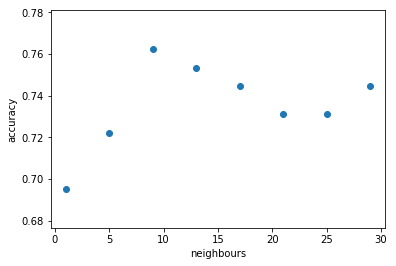

In [273]:
neighbours = [i for i in range(1, 30, 4)]

plt.scatter(neighbours, acc)
plt.xlabel('neighbours')
plt.ylabel('accuracy')
plt.show()

In [274]:
bestK = neighbours[np.argmax(acc)]
bestAcc = max(acc)

print('Melhor k: {0}'.format(bestK))
print('Precisão do melhor k: {0}\n'.format(bestAcc))

predictionsBestK = predict(X_train_new, y_train_new, X_test_new, bestK)
print(metrics.classification_report(y_test_new, predictionsBestK, target_names=['Survived', 'Not Survived']))

Melhor k: 9
Precisão do melhor k: 0.7623318385650224

              precision    recall  f1-score   support

    Survived       0.79      0.83      0.81       138
Not Survived       0.71      0.65      0.67        85

 avg / total       0.76      0.76      0.76       223

